In [1]:
library(tidyverse)
library(magrittr)
library(ggrepel)
library(plotly)
library(gridExtra)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract

Warning message:
"package 'plotly' was built under R version 3.6.3"
Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [2]:
casesLocal <- read_csv('casesLocal.csv')
testsLocal <- read_csv('testsLocal.csv')
counterMeasures <- read_csv('counterMeasures.csv')
casesGlobal <- read_csv('casesGlobal.csv')
url <- 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
testsGlobal <- read_csv(url) %>% 
  select(
    date, location, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, tests_units
    ) %>%
  rename(country = location)

populationGlobal <- read_csv('populationGlobal.csv') %>%
  set_names(c('X', 'Rank', 'country', 'population', '%_of_world_pop', 'date', 'source')) %>%
  select(country, population)

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_date(format = ""),
  confirmed = col_double(),
  country_id = col_double(),
  id = col_double(),
  location = col_character(),
  location_level = col_character()
)
Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_date(format = ""),
  country = col_character(),
  cumulative_tests = col_double()
)
Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_date(format = ""),
  country = col_character(),
  measure = col_character(),
  value = col_double()
)
Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_date(format = ""),
  active = col_double(),
  active_dailiy_growth_rate = col_double(),
  active_rolling_3_day_growth_rate = col_double(),
  confirmed = col_double(),
  confirmed_daily = col_double(),
  country

In [3]:
theme_set(
  theme_bw()
)

In [4]:
casesGlobal %<>%
  mutate(country = ifelse(country == 'US', 'United States', country))

In [5]:
columns_of_interest <- 
  c(
    'date', 'country', 
    'active', 'active_dailiy_growth_rate', 'active_rolling_3_day_growth_rate', 'daily_change_in_active_cases',
    'confirmed', 'deaths', 'recovered'
    )

testsGlobal  %>% 
  select(date, country, total_tests) %>%
  right_join(
    casesGlobal %>%
      rename(date = X1) %>%
      select(columns_of_interest) 
  ) %>% 
  inner_join(
    populationGlobal, by = 'country'
  )  ->
  df

Joining, by = c("date", "country")


In [6]:
all_countries = df %>% '$'(country) %>% unique
daily_data <- tibble()

for (i in all_countries) {
  
  df %>%
    filter(country == i) %>% 
    fill(total_tests, .direction = c('down')) ->
    data
  
  data %>%
    mutate(Day = c(1:nrow(data))) %>%
    rbind(
      daily_data
    )  %>%
    select(date, Day, country, everything()) -> 
    daily_data
  
}

In [7]:
daily_data %<>%
  mutate(
    transmission_rate = round((confirmed / population) * 1000000, 2),
    infection_rate = round((confirmed / total_tests) * 1000, 0),
    death_rate = round((deaths / confirmed) * 100, 0),
    recovery_rate = round((recovered / confirmed) * 100, 0) 
    ) 
  
daily_data %>% 
  group_by(country) %>%
  summarise(
    highest_transmission_rate = max(transmission_rate, na.rm = T),
    highest_infection_rate = max(infection_rate, na.rm = T),
    highest_active = max(active, na.rm = T),
    highest_avg_roll_growth_rate = max(active_rolling_3_day_growth_rate, na.rm = T),
    highest_death_rate = mean(death_rate, na.rm = T),
    highest_recovery_rate = max(recovery_rate, na.rm = T)
  ) ->
  filter_data


Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"

"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):
"no non-missing arguments to max; returning -Inf"Warning message in max(infection_rate, na.rm = T):


In [8]:
plot_graph <- function(df, column, .filter) {
  
  df %>%
    select(date, Day, country, column) %>%
    filter(country %in% .filter) %>%
    gather(feature, value, -c('date', 'Day', 'country')) ->
    daily_data_trans
  
  daily_data_trans  %>%
    ggplot(aes(Day, value, color = country)) +
    geom_line() +
    facet_wrap( ~ feature, scales = 'free_y', nrow = 2, strip.position = 'left') +
    geom_point(data = daily_data_trans %>%
                 group_by(country, feature) %>%
                 summarise(Day = max(Day, na.rm = T),
                           value = max(value, na.rm = T)),
              aes(size = value)) +
    geom_text_repel(aes(label = country), 
                    data = daily_data_trans %>%
                      group_by(country, feature) %>%
                      summarise(Day = max(Day, na.rm = T),
                                value = max(value, na.rm = T)),
                    vjust = -1) +
    scale_x_continuous(breaks = seq(0, length(daily_data_trans$Day %>% unique), 5)) +
    scale_y_continuous(labels = scales::comma) +
    theme(
      legend.position = 'none',
      strip.placement = 'outside'
    ) +
    labs(
      x = 'Number of days since inception', y = '',
      title = 'South Africa Vs other countries'
    ) -> 
    fig1 
  
  return(fig1)
  
}

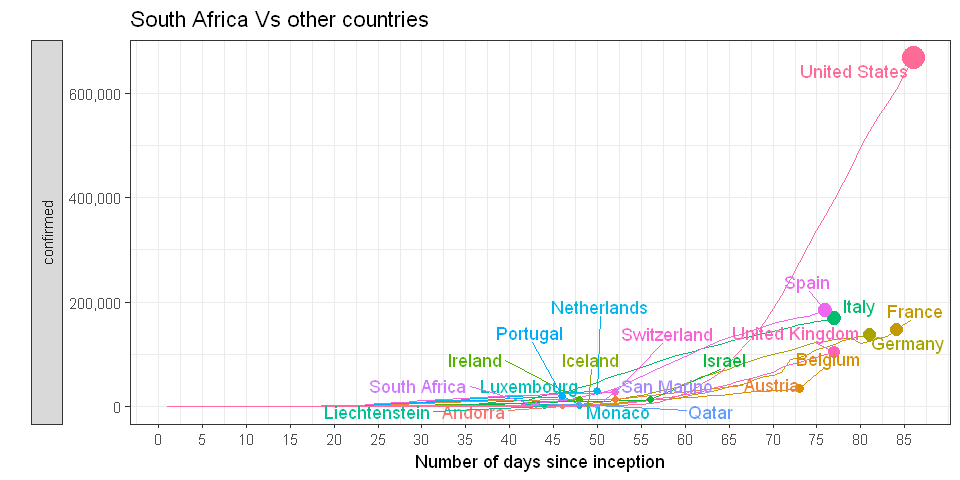

In [9]:
options(repr.plot.width = 8, repr.plot.height = 4)
filter_data %>%
  arrange(-highest_transmission_rate) %>%
  '$'(country) %>%
  .[c(1:20)] %>%
  union(c('South Africa')) ->
  top_countries_by_transmission

plot_graph(
  df = daily_data, column = 'confirmed', .filter = top_countries_by_transmission
) ->
  fig
fig

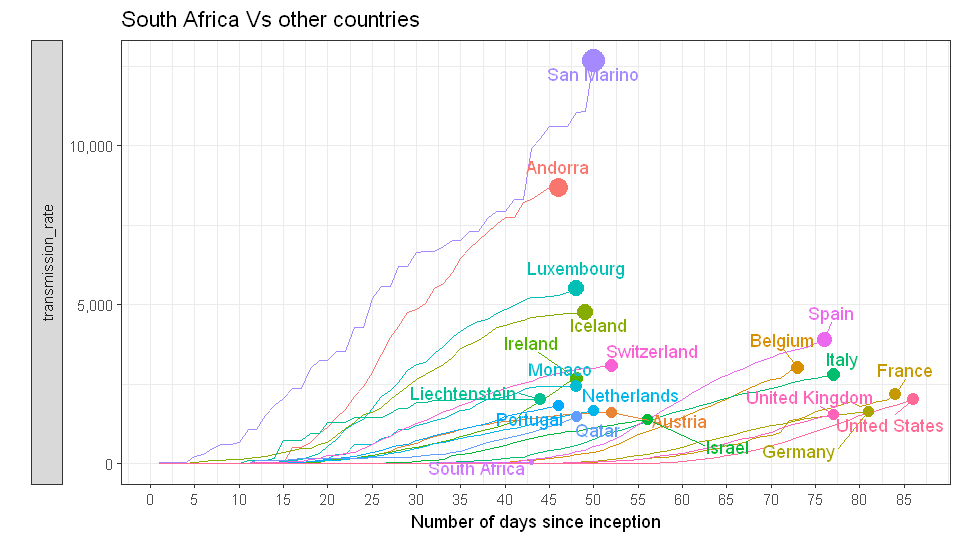

In [10]:
options(repr.plot.width = 8, repr.plot.height = 4.5)
filter_data %>%
  arrange(-highest_transmission_rate) %>%
  '$'(country) %>%
  .[c(1:20)] %>%
  union(c('South Africa')) ->
  top_countries_by_transmission

plot_graph(
  df = daily_data, column = 'transmission_rate', .filter = top_countries_by_transmission
) ->
  fig1
fig1

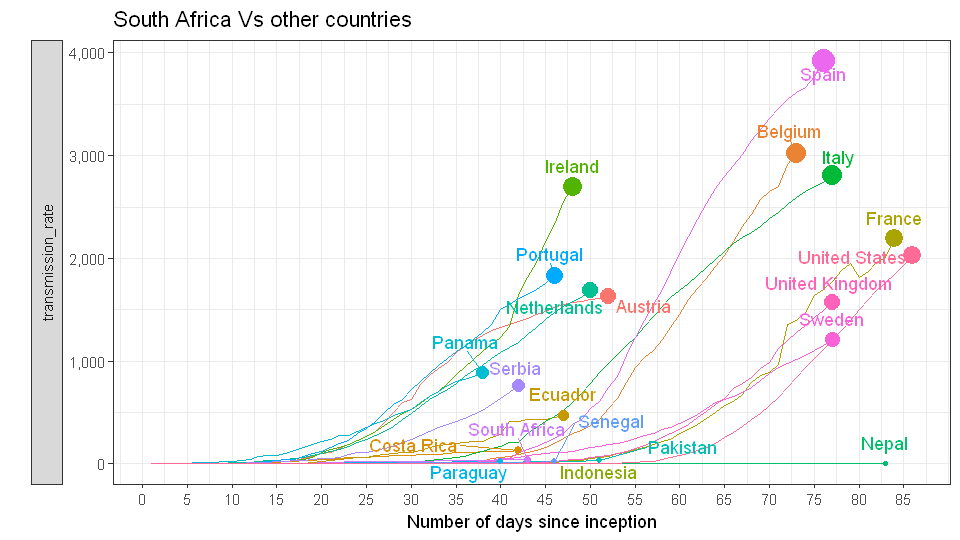

In [11]:
options(repr.plot.width = 8, repr.plot.height = 4.5)
filter_data %>%
  arrange(-highest_infection_rate) %>%
  '$'(country) %>%
  .[c(1:20)] %>%
  union(c('South Africa')) ->
  top_countries_by_infection

plot_graph(
  df = daily_data, column = 'transmission_rate', .filter = top_countries_by_infection
) -> 
  fig2
fig2

In [21]:
options(repr.plot.width = 8, repr.plot.height = 5)
daily_data %>%
  select(Day, country, total_tests, population, confirmed, infection_rate) %>%
  filter(
    Day == 43 & 
    !is.na(total_tests) & 
    country %in% c(top_countries_by_infection, top_countries_by_transmission)
    ) %>%
  mutate(tests_per_million = (total_tests / population) * 1000000) %>%
  select(Day, country, infection_rate, tests_per_million) ->
  test_data_spread

test_data_spread %>%
  arrange(desc(tests_per_million)) %>%
  top_n(n = 10, wt = tests_per_million) %>% 
  '$'(country) %>%
  unique -> 
  top_testing_countries
  
test_data_spread %>%
  arrange(infection_rate) %>%
  top_n(n = -10, wt = infection_rate) %>% 
  '$'(country) %>%
  unique -> 
  top_infected_countries

`%notin%` <- Negate(`%in%`)

test_data_spread %>%
  mutate(id = ifelse(country %in% top_testing_countries, 'High tests per million', 'High infections per thousand')) %>%
  mutate(id = ifelse(country %notin% c(top_testing_countries, top_infected_countries), 'none', id))  %>%
  filter(id != 'none') %>%
  gather(feature, value, -c('Day', 'country', 'id')) %>%
  arrange(feature, value) %>%
  mutate(order = row_number(),
         feature = factor(feature, levels = c('tests_per_million', 'infection_rate'))) ->
  tests_data 

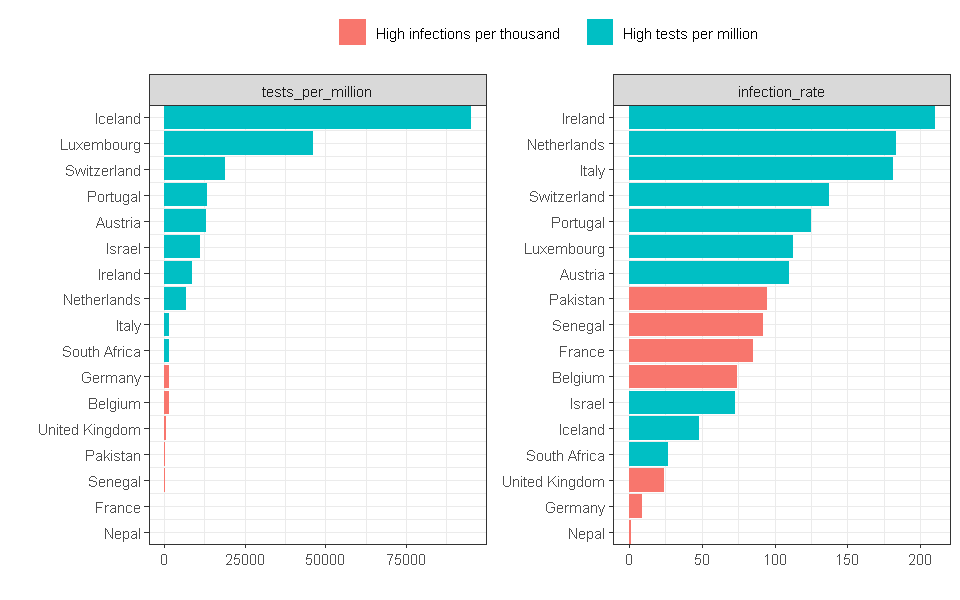

In [23]:
options(repr.plot.width = 8, repr.plot.height = 5)
tests_data %>%
  ggplot(aes(order, value, fill = id)) +
  geom_col() +
  facet_wrap( ~ feature, scales = 'free') +
  theme(
    legend.position = 'top',
    legend.title = element_blank()
  ) +
  scale_x_continuous(
    breaks = tests_data$order,
    labels = tests_data$country,
    expand = c(0,0)
  ) +
  labs(
      x = '', y = ''
  ) +
  coord_flip()